# Predicting song's genre using ML
* Problem definition - check several classification models and try to achieve best accuracy in prediction genre of a song from data provided
* Data - Data has been obtained from Kaggle: https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify
* Evaluation - try several models and reach the best possible accuracy
* Features - data consists of several features such as danceability, energy, key, loudness, mode in numerical format and other categorical features.
* Modelling - we will try K-Nearest Neigbors, Random Forest and Logistic Regression model for evaluation
* Experimentation - this section will involve fine tuning some of the hyperparameters to see if we can improve the accuracy

Preparing the tools
Pandas,Matplotlib, and Numpy for data analysis and manipulation

In [41]:
#Import EDA (exploratory data analysis) and plotting library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [42]:
data= pd.read_excel("spotify_genre_final.xlsx")
data.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


In [43]:
#Check the number of rows and columns
data.shape

(6917, 23)

In [44]:
#Check and view data in transposed form to view all columns
data.head().T

,0,1,2,3,4
Genre,rock,rock,rock,rock,rock
Title,Baba O'Riley,More Than a Feeling,(Don't Fear) The Reaper,Jump - 2015 Remaster,Stairway to Heaven - Remaster
Album_cover_link,https://i.scdn.co/image/ab67616d0000b273fe24dc...,https://i.scdn.co/image/ab67616d0000b27390ef97...,https://i.scdn.co/image/ab67616d0000b2733ac318...,https://i.scdn.co/image/ab67616d0000b273b414c6...,https://i.scdn.co/image/ab67616d0000b273c8a11e...
Artist,The Who,Boston,Blue Öyster Cult,Van Halen,Led Zeppelin
duration_ms,300400,285133,308120,241599,482830
explicit,False,False,False,False,False
id,3qiyyUfYe7CRYLucrPmulD,1QEEqeFIZktqIpPI4jSVSF,5QTxFnGygVM4jFQiBovmRo,7N3PAbqfTjSEU1edb2tY8j,5CQ30WqJwcep0pYcV4AMNc
popularity,75,78,76,78,79
release_date,1971-08-14,1976,1976,1984-01-04,1971-11-08
release_date_precision,day,year,year,day,day


In [45]:
#Since we are going to predict the genre , let's check the "genre" column for data types
data["Genre"].value_counts()

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64

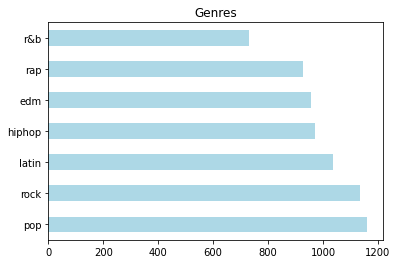

In [46]:
#Let's plot the above date from "genre" columns in bar plot for better vizualization
data["Genre"].value_counts().plot(kind="barh",color=["lightblue"],title="Genres");

In [47]:
#Let's check and see if we have missing data
data.isna().sum()

Genre                     0
Title                     0
Album_cover_link          0
Artist                    0
duration_ms               0
explicit                  0
id                        0
popularity                0
release_date              0
release_date_precision    0
total_tracks              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

As we can see above, missing values are only in last 3 columns and this will not affect our analysis of predicting genre

In [48]:
#Finally we can check the data types in our data frame
data.dtypes
#Based on below we will base the prediction analysis only on numerical data

Genre                      object
Title                      object
Album_cover_link           object
Artist                     object
duration_ms                 int64
explicit                     bool
id                         object
popularity                  int64
release_date               object
release_date_precision     object
total_tracks                int64
danceability              float64
energy                    float64
key                         int64
loudness                  float64
mode                        int64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
time_signature              int64
dtype: object

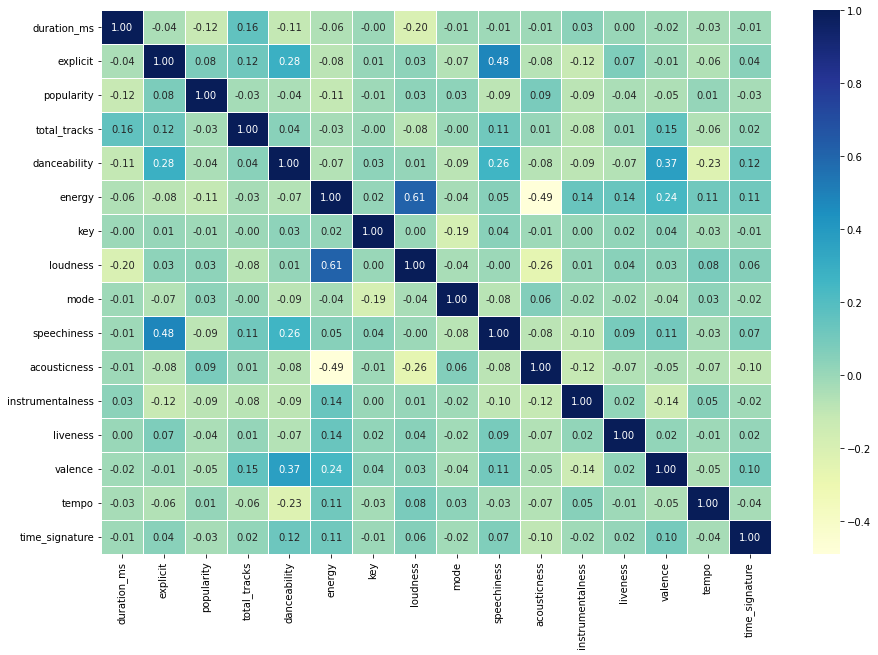

In [49]:
#Correlation analysis using Seaborn heatmap for data analysis
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## Modelling

In [50]:
#Split the data into X and y
ColPasUtile = ['Genre','Title', 'Album_cover_link', 'Artist', 'duration_ms',
       'explicit', 'id', 'popularity', 'release_date',
       'release_date_precision', 'total_tracks','time_signature']

num_data=data.drop(ColPasUtile,axis=1).values
y = data['Genre'].values
X = data.drop(ColPasUtile, axis=1).values


In [51]:
#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#### We will use 3 different models for this problem:
    1. Logistic regression
    2. K-Nearest
    3. Random Forest

In [52]:
#For that we will create a fuction in order to evaluate and compare models easily
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(1)
    model_scores={}
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [53]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\Julia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogReg': 0.36921965317919075,
 'KNN': 0.26445086705202314,
 'Random Forest': 0.44942196531791906}

## Model comparison

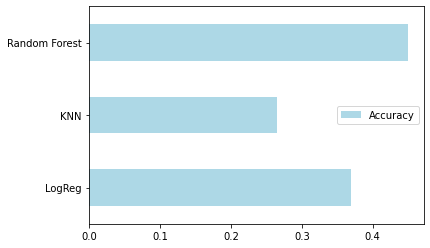

In [54]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.barh(color=["lightblue"]);

#### Now as we have initial Accuracy scoring of 3 models, let's look at following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision, Recall, F1 score
* Classification report

## Hyperparameter tuning
1. HP tuning by hand
2. HP tuning with RandomizedSearchCV

#### Hyperparameter tuning for KNN manually

In [55]:
#Tuning for KNN model
train_scores=[]
test_scores=[]
#Create list of different n-neighbors
neighbors = range(1,15)
#Setup KNN instance
knn=KNeighborsClassifier()
#Loop through different neigbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train) #Fit the model
    train_scores.append(knn.score(X_train,y_train)) #Update the train score list
    test_scores.append(knn.score(X_test,y_test)) #Update test scores list

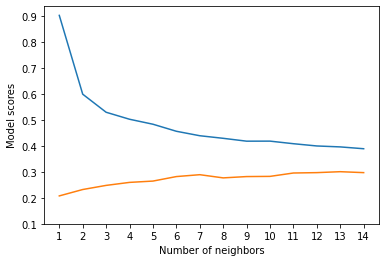

In [56]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,15,1))
plt.yticks(np.arange(0.1,1,0.1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend;

The above chart shows that the best K-value giving higher prediction is *1* where we can see 36% accuracy level which is still low.
Let's look for other models and see whether we can improve accuracy

#### Hyperparameter tuning with RandomizedSearchCV for LogReg and Random Forest models
Let's tune LogReg and Random Forest models using RandomizedSearchCV

In [57]:
#Hyperparameter grid for Logistic Regression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Hyperparameter grid for Random Forest
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [58]:
#Tune LogReg model
np.random.seed(1)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit random hyperparameter search model to LogReg
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
#Let's check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [60]:
rs_log_reg.score(X_test,y_test)

0.467485549132948

The above score is very very small increase from initial scoring, now let's try same with Random Forest and see how it can improve the scoring

In [61]:
#Tune Random Forest model
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [ ]:
rs_rf.score(X_test,y_test)

0.48988439306358383

### Evaluating tuned machine learning classifier , beyond accuracy

* Comparison of real and predicted results
* Classification report
* Precision
* Recall
* F1 score

Since Random Forest tuned model give the best results, going further we will evaluate only that model

In [ ]:
#Make predictions with tuned model
y_preds=rs_rf.predict(X_test)
preds_df=pd.DataFrame(y_preds)
preds_df.head()

,0
0,latin
1,hiphop
2,hiphop
3,rap
4,rap


In [ ]:
#Check actual vs predictions
comparison=pd.DataFrame(data={"actual":y_preds,"prediction":y_test})
comparison.head()

,actual,prediction
0,latin,latin
1,hiphop,rap
2,hiphop,rap
3,rap,hiphop
4,rap,rap


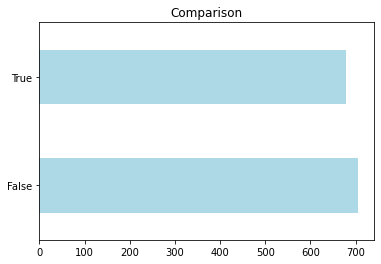

In [ ]:
#Calculate number of true and false predictions
comparison["result"]=comparison["actual"]==comparison["prediction"]
comparison["result"].value_counts().plot(kind="barh",color=["lightblue"],title="Comparison");

#### Classification report for Precision, F1 Score and Recall

In [ ]:
#Classification report for precision, recall, f1score and accuracy
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         edm       0.69      0.65      0.67       196
      hiphop       0.38      0.43      0.41       210
       latin       0.60      0.56      0.58       216
         pop       0.39      0.47      0.42       231
         r&b       0.30      0.19      0.23       132
         rap       0.37      0.29      0.33       198
        rock       0.63      0.74      0.68       201

    accuracy                           0.49      1384
   macro avg       0.48      0.48      0.47      1384
weighted avg       0.49      0.49      0.48      1384



#### Feature importance
Checking with features contributed most to the outcome

In [ ]:
feat=RandomForestClassifier(n_estimators= 460,       #Using best params obtained earlier
                            min_samples_split= 6,
                            min_samples_leaf= 9,
                            max_depth= None)
feat.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=9, min_samples_split=6,
                       n_estimators=460)

In [ ]:
feat.feature_importances_

array([0.16117013, 0.09608348, 0.02018438, 0.08789834, 0.01083887,
       0.18195414, 0.10201793, 0.09448188, 0.03384486, 0.11764056,
       0.09388543])

In [ ]:
#Match coefficients of features to columns
feature_dict=dict(zip(num_data.columns,list(feat.feature_importances_))).values
#Vizualize the feature importance
feature_data=pd.DataFrame(feature_dict,index=[0])
feature_data.T.plot.barh(title="Feature importance",legend=False,color="lightblue",grid=False);

NameError: name 'num_data' is not defined